# Long-Short Term Memory Network for Time Series Prediction

In [11]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import pandas as pd
df = pd.read_csv('DFI-final_df_no_duplication.csv',delimiter='|')
df.head()

Using TensorFlow backend.


,Unnamed: 0,Unnamed: 0.1,img,product_Type,All_Text,TimeSeries_price,TimeSeries_Date,TimeSeries_price_log,TimeSeries_price_MinMaxScaler,TimeSeries_price_Standardized
0,0,21,foa_06082307_3053_1.jpg,generalforsale,vintage sharif purse if you are reading this l...,60.141,1,4.113183,0.239475,-0.680611
1,1,20,hsa_07080320_8694_1.jpg,householditems,ceiling mounted light fixture works great. com...,160.285,1,5.083173,0.376695,0.064157
2,2,12,hsa_07080320_8686_1.jpg,householditems,kitchen gadgets assorted kitchen gadgets and a...,159.379,1,5.077540,0.375898,0.059832
3,3,27,foa_06082307_3098_1.jpg,generalforsale,case of libbey 155 1 34 oz spirit dessert shot...,59.550,1,4.103469,0.238101,-0.688069
4,4,4,ela_07080117_5711_1.jpg,electronics,xbox 360 game system xbox 360 game system cond...,102.188,1,4.636553,0.313513,-0.278763


In [12]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        #print(a)
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        #print(dataY)
    return np.array(dataX), np.array(dataY)

In [13]:
# creating functions for LSTM variations
def LSTM_Network_for_Regression(train, test, look_back, verbose, show_plt):
    # reshape into X=t and Y=t+1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
        
    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(10, input_shape=(1, trainX.shape[1])))
    model.add(Dense(1)) # an output layer that makes a single value prediction. Dense is the output layer, 0 or 1 , as it is a binary classification 
    model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['accuracy'])
    
    #model.summary()
    history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=verbose)
    
    #print(History.history['acc'])
    #print(History.history['val-acc'])
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)

    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('LSTM_Network_for_Regression Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('LSTM_Network_for_Regression Test Score: %.2f RMSE' % (testScore))

    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

    # plot baseline and predictions
    if show_plt:
        plt.figure(figsize=(12,12))
        plt.plot(scaler.inverse_transform(dataset))
        plt.plot(trainPredictPlot)
        plt.plot(testPredictPlot)
        plt.show()
        print('\n')
    
def LSTM_Using_the_Window_Method(train, test, look_back, verbose, show_plt):
    # reshape into X=t and Y=t+1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    
    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=verbose)

    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)

    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('LSTM_Using_the_Window_Method Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('LSTM_Using_the_Window_Method Test Score: %.2f RMSE' % (testScore))

    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

    # plot baseline and predictions
    if show_plt:
        plt.figure(figsize=(12,12))
        plt.plot(scaler.inverse_transform(dataset))
        plt.plot(trainPredictPlot)
        plt.plot(testPredictPlot)
        plt.show()
        print('\n')
    
def LSTM_with_Time_Steps(train, test, look_back, verbose, show_plt):
    # reshape into X=t and Y=t+1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=verbose)

    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)

    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('LSTM_with_Time_Steps Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('LSTM_with_Time_Steps Test Score: %.2f RMSE' % (testScore))

    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

    # plot baseline and predictions
    if show_plt:
        plt.figure(figsize=(12,12))
        plt.plot(scaler.inverse_transform(dataset))
        plt.plot(trainPredictPlot)
        plt.plot(testPredictPlot)
        plt.show()
        print('\n')
        
def LSTM_with_Memory_Between_Batches(train, test, look_back, verbose, show_plt):
    # reshape into X=t and Y=t+1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

    # create and fit the LSTM network
    batch_size = 1
    model = Sequential()
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(100):
        model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=verbose, shuffle=False)
        model.reset_states()

    # make predictions
    trainPredict = model.predict(trainX, batch_size=batch_size)
    model.reset_states()
    testPredict = model.predict(testX, batch_size=batch_size)

    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('LSTM_with_Memory_Between_Batches Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('LSTM_with_Memory_Between_Batches Test Score: %.2f RMSE' % (testScore))

    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

    # plot baseline and predictions
    if show_plt:
        plt.figure(figsize=(12,12))
        plt.plot(scaler.inverse_transform(dataset))
        plt.plot(trainPredictPlot)
        plt.plot(testPredictPlot)
        plt.show()
        print('\n')
        
def Stacked_LSTMs_with_Memory_Between_Batches(train, test, look_back, verbose, show_plt):
    # reshape into X=t and Y=t+1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

    # create and fit the LSTM network
    batch_size = 1
    model = Sequential()
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(100):
        model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=verbose, shuffle=False)
        model.reset_states()

    # make predictions
    trainPredict = model.predict(trainX, batch_size=batch_size)
    model.reset_states()
    testPredict = model.predict(testX, batch_size=batch_size)

    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Stacked_LSTMs_with_Memory_Between_Batches Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Stacked_LSTMs_with_Memory_Between_Batches Test Score: %.2f RMSE' % (testScore))

    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

    # plot baseline and predictions
    if show_plt:
        plt.figure(figsize=(12,12))
        plt.plot(scaler.inverse_transform(dataset))
        plt.plot(trainPredictPlot)
        plt.plot(testPredictPlot)
        plt.show()
        print('\n')
        

car & truck
LSTM_Network_for_Regression Train Score: 0.97 RMSE
LSTM_Network_for_Regression Test Score: 1.47 RMSE


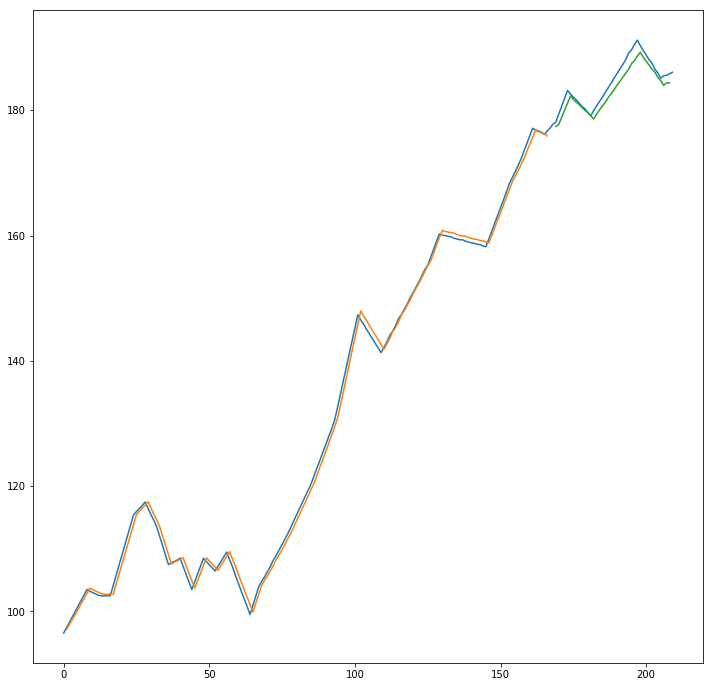



LSTM_Using_the_Window_Method Train Score: 0.98 RMSE
LSTM_Using_the_Window_Method Test Score: 1.37 RMSE


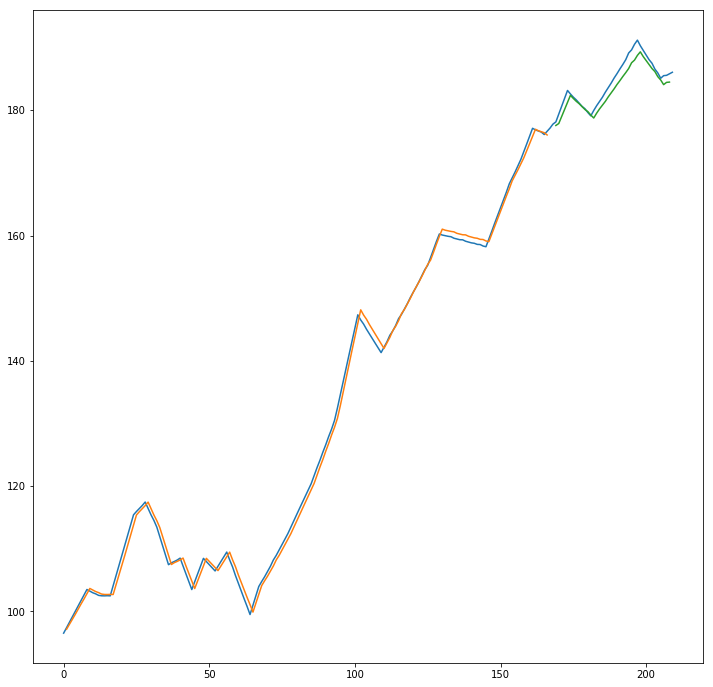



LSTM_with_Time_Steps Train Score: 1.58 RMSE
LSTM_with_Time_Steps Test Score: 2.34 RMSE


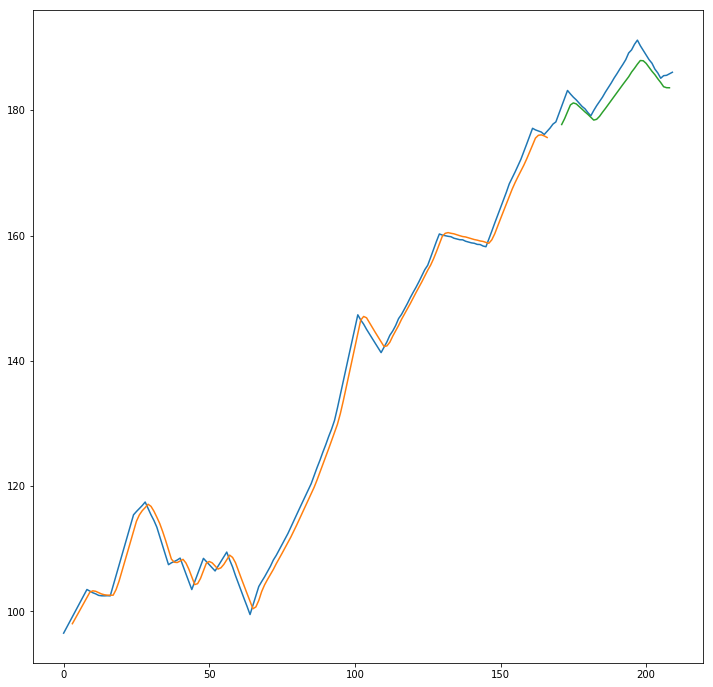



LSTM_with_Memory_Between_Batches Train Score: 2.66 RMSE
LSTM_with_Memory_Between_Batches Test Score: 2.69 RMSE


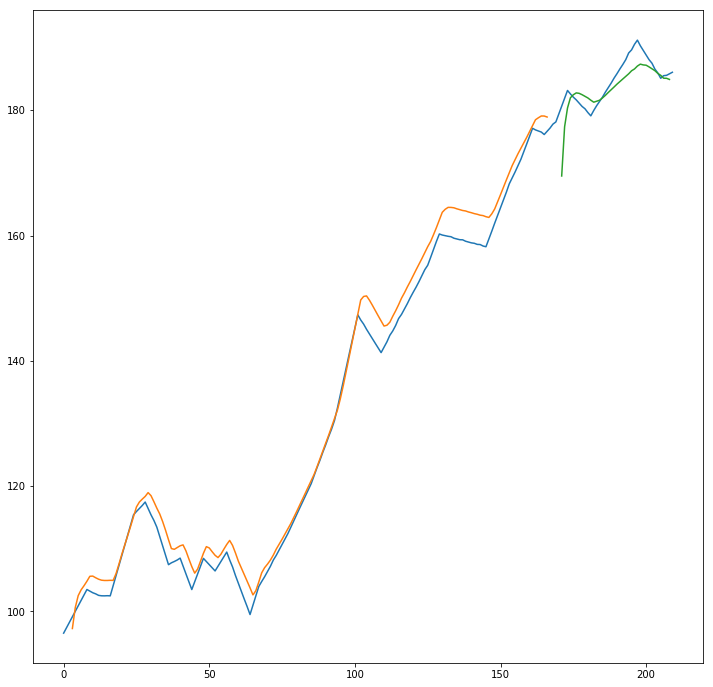



Stacked_LSTMs_with_Memory_Between_Batches Train Score: 3.91 RMSE
Stacked_LSTMs_with_Memory_Between_Batches Test Score: 5.88 RMSE


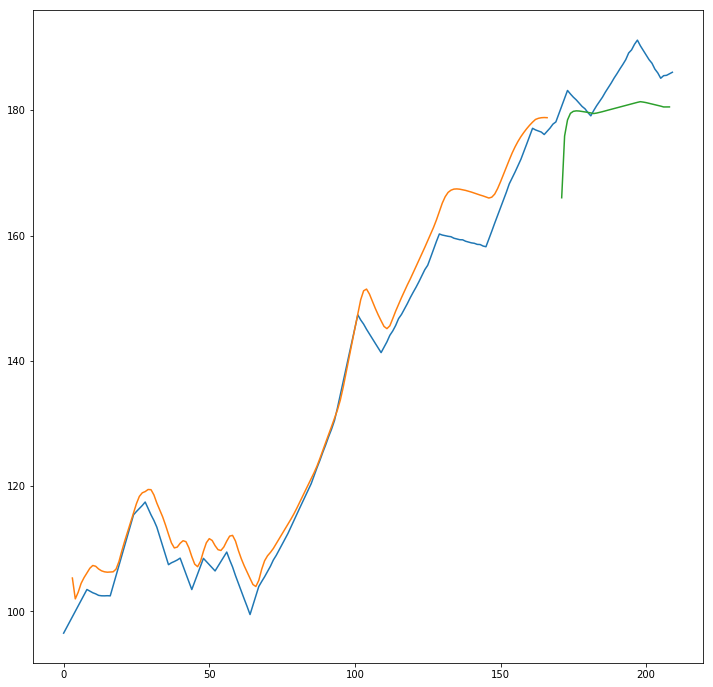

In [17]:

for pt in df.product_Type.unique()[5:6]:
    print('===================\n%s\n==================='%pt)
    single_pt_df = df[df['product_Type']==pt].groupby(['TimeSeries_Date']).agg({"TimeSeries_price":['min','max']})
    single_pt_df = single_pt_df.reset_index()
    single_pt_df.columns = ['time_point','min','max']
    single_pt_df['range'] = single_pt_df['max'] - single_pt_df['min']
    # print(single_pt_df,'*'*80,'\n\n\n')
        
    cols_name = ['min','max','range']
    for col in cols_name[:1]:
        dataset = single_pt_df[col].values.astype('float32').reshape(-1,1)
    
        # normalize the dataset , to the range of 0-to-1
        scaler = MinMaxScaler(feature_range=(0, 1))
        dataset = scaler.fit_transform(dataset)

        train_size = int(len(dataset) * 0.8)
        train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
        # print((train).shape, len(test))
    
        verbose = 0
        show_plt = 1
        
        LSTM_Network_for_Regression(train, test, look_back=1, verbose=verbose, show_plt=show_plt )
        LSTM_Using_the_Window_Method(train, test, look_back=1, verbose=verbose, show_plt=show_plt )
        LSTM_with_Time_Steps(train, test, look_back=3, verbose=verbose, show_plt=show_plt )
        LSTM_with_Memory_Between_Batches(train, test, look_back=3, verbose=verbose, show_plt=show_plt )
        Stacked_LSTMs_with_Memory_Between_Batches(train, test, look_back=3, verbose=verbose, show_plt=show_plt )